In [4]:
import cv2
import pandas as pd
import numpy as  np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from keras.preprocessing import image
import os
import tensorflow_hub as hub
from tensorflow import keras

In [9]:
print(len(os.listdir('C:/Users/hp/Downloads/impo_datasets/thyroid/train/benign')))
print(len(os.listdir('C:/Users/hp/Downloads/impo_datasets/thyroid/train/malignant')))
print(len(os.listdir('C:/Users/hp/Downloads/impo_datasets/thyroid/test/benign')))
print(len(os.listdir('C:/Users/hp/Downloads/impo_datasets/thyroid/test/malignant')))

11
28
3
7


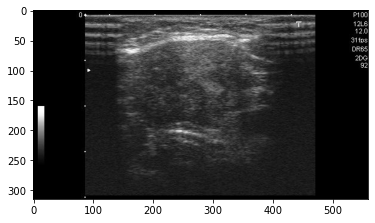

In [12]:
DATADIR = r"C:/Users/hp/Downloads/impo_datasets/thyroid/train"
CATEGORIES = ['benign','malignant']
#Visualising malignant thyriod
path = os.path.join(DATADIR,'malignant')
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

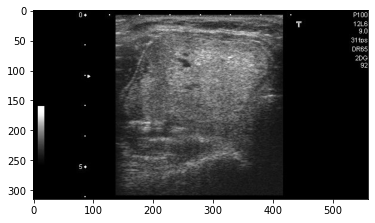

In [13]:
#Visualising Benign thyriod
path = os.path.join(DATADIR,'benign')
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [28]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation='sigmoid')
])


In [29]:
model.compile(optimizer = 'Adam',
             loss= 'binary_crossentropy',
             metrics=['accuracy']
             )

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 17, 17, 128)      

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
TRAINING_DIR = 'C:/Users/hp/Downloads/impo_datasets/thyroid/train'
VALIDATION_DIR = 'C:/Users/hp/Downloads/impo_datasets/thyroid/test'
train_datagen = ImageDataGenerator(rescale=1/255,
                                  zoom_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   target_size=(150,150),
                                                   batch_size=10,
                                                   class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             target_size=(150,150),
                                                             batch_size=10,
                                                             class_mode='binary')

Found 39 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [37]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs=10,
    steps_per_epoch= 4,
    validation_steps=2
)

Epoch 1/10
4/4 [==============================] - 3s 606ms/step - loss: 0.2042 - accuracy: 0.8718 - val_loss: 1.0863 - val_accuracy: 0.8000
Epoch 2/10
4/4 [==============================] - 2s 503ms/step - loss: 0.1898 - accuracy: 0.9231
Epoch 3/10
4/4 [==============================] - 2s 486ms/step - loss: 0.0588 - accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 2s 524ms/step - loss: 0.1226 - accuracy: 0.9744
Epoch 5/10
4/4 [==============================] - 2s 534ms/step - loss: 0.0454 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 2s 530ms/step - loss: 0.0676 - accuracy: 0.9744
Epoch 7/10
4/4 [==============================] - 2s 485ms/step - loss: 0.0841 - accuracy: 0.9744
Epoch 8/10
4/4 [==============================] - 2s 493ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 2s 493ms/step - loss: 0.0409 - accuracy: 0.9744
Epoch 10/10
4/4 [==============================] - 2s 491ms/step - loss: 0.0